# Aerial Imaging & Urban Land Cover  

Our client is a representative of a government agency and has come to Redhorse Corporation to seek aid in classifying high resolution aerial images. One of the agency’s jobs is to assist in various urban planning efforts. The agency has recently started to develop high resolution aerial images of a city using drones. They hope to be able to identify sections in the city that fit into one of nine types of urban land cover: trees, grass, soil, concrete, asphalt, buildings, cars, pools, and shadows. Knowing how these areas are classified will help with future planning efforts. 

Although the agency has several thousand images, they have limited resources to manually classify each image. Our team is tasked with automating this classification process. The client has provided us a sample of roughly 650 labeled images. 

Our team has processed the data at various coarse levels and feature engineered 20 features for each level. These features reflect spectral, size, shape, and texture information for each image. The data has already been separated into training and testing, but feel free to modify the proportions if/when creating model. 

Data Source: Urban Land Cover Data Set – UCI Machine Learning Repository

1. Johnson, B., Xie, Z., 2013. Classifying a high resolution image of an urban area using super-object information. ISPRS Journal of Photogrammetry and Remote Sensing, 83, 40-49.

2. Johnson, B., 2013. High resolution urban land cover classification using a competitive multi-scale object-based approach. Remote Sensing Letters, 4 (2), 131-140.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#  <font color = 'purple'>1. Importing Dataset<font/>

In [4]:
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('testing.csv')

print(train_data.head())

       class  BrdIndx  Area  Round  Bright  Compact  ShpIndx  Mean_G  Mean_R  \
0       car      1.27    91   0.97  231.38     1.39     1.47  207.92  241.74   
1  concrete      2.36   241   1.56  216.15     2.46     2.51  187.85  229.39   
2  concrete      2.12   266   1.47  232.18     2.07     2.21  206.54  244.22   
3  concrete      2.42   399   1.28  230.40     2.49     2.73  204.60  243.27   
4  concrete      2.15   944   1.73  193.18     2.28     4.10  165.98  205.55   

   Mean_NIR  ...  SD_NIR_140  LW_140  GLCM1_140  Rect_140  GLCM2_140  \
0    244.48  ...       26.18    2.00       0.50      0.85       6.29   
1    231.20  ...       22.29    2.25       0.79      0.55       8.42   
2    245.79  ...       15.59    2.19       0.76      0.74       7.24   
3    243.32  ...       13.51    3.34       0.82      0.74       7.44   
4    208.00  ...       15.65   50.08       0.85      0.49       8.15   

   Dens_140  Assym_140  NDVI_140  BordLngth_140  GLCM3_140  
0      1.67       0.70   

In [5]:
print(train_data.head())

       class  BrdIndx  Area  Round  Bright  Compact  ShpIndx  Mean_G  Mean_R  \
0       car      1.27    91   0.97  231.38     1.39     1.47  207.92  241.74   
1  concrete      2.36   241   1.56  216.15     2.46     2.51  187.85  229.39   
2  concrete      2.12   266   1.47  232.18     2.07     2.21  206.54  244.22   
3  concrete      2.42   399   1.28  230.40     2.49     2.73  204.60  243.27   
4  concrete      2.15   944   1.73  193.18     2.28     4.10  165.98  205.55   

   Mean_NIR  ...  SD_NIR_140  LW_140  GLCM1_140  Rect_140  GLCM2_140  \
0    244.48  ...       26.18    2.00       0.50      0.85       6.29   
1    231.20  ...       22.29    2.25       0.79      0.55       8.42   
2    245.79  ...       15.59    2.19       0.76      0.74       7.24   
3    243.32  ...       13.51    3.34       0.82      0.74       7.44   
4    208.00  ...       15.65   50.08       0.85      0.49       8.15   

   Dens_140  Assym_140  NDVI_140  BordLngth_140  GLCM3_140  
0      1.67       0.70   

# <font color = 'purple'>2. Explorlatory Data Analysis<font/>

In [6]:
# Checking the shape of the training and testing data sets

print("Training Data Set has {} rows and {} columns".format(train_data.shape[0],train_data.shape[1]))
print("Test Data Set has {} rows and {} columns".format(test_data.shape[0],test_data.shape[1]))


Training Data Set has 168 rows and 148 columns
Test Data Set has 507 rows and 148 columns


In [7]:
# Checking whether the train and test data sets have the same columns
(train_data.columns == test_data.columns).sum()

148

In [8]:
train_data.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


In [9]:
test_data.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,concrete,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,...,31.15,5.04,0.80,0.58,8.56,0.82,0.98,-0.10,1512,1287.52
1,shadow,1.59,864,0.94,47.56,1.41,1.87,36.82,48.78,57.09,...,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74
2,shadow,1.41,409,1.00,51.38,1.37,1.53,41.72,51.96,60.48,...,18.75,3.09,0.90,0.63,8.32,1.38,0.84,0.10,1198,720.38
3,tree,2.58,187,1.91,70.08,3.41,3.11,93.13,55.20,61.92,...,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524,891.36
4,asphalt,2.60,116,2.05,89.57,3.06,3.02,73.17,94.89,100.64,...,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496,1194.76


In [10]:
# Combining the two datasets from the source to change the proportion of training and test sets
all_data = pd.concat([train_data,test_data], axis = 0, ignore_index = True)
all_data.shape

(675, 148)

In [11]:
all_data.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


In [12]:
# Explore Continuous Features
all_data.describe()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,...,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,2.021437,563.342222,1.211541,165.602207,2.159852,2.265511,165.117274,162.635541,169.053748,10.577422,...,24.394252,2.973126,0.812430,0.614474,7.985689,1.490326,0.644311,0.024237,1295.318519,1145.129319
std,0.622732,693.523565,0.546297,62.852619,0.834899,0.714544,60.274195,72.876234,69.240038,5.024703,...,12.359619,5.250981,0.105816,0.195138,0.767758,0.457600,0.248885,0.139031,1062.153765,556.716342
min,1.000000,10.000000,0.000000,26.850000,1.000000,1.040000,22.910000,26.520000,31.110000,3.550000,...,2.650000,1.000000,0.200000,0.100000,5.690000,0.230000,0.030000,-0.360000,34.000000,211.270000
25%,1.570000,160.500000,0.825000,127.685000,1.620000,1.705000,132.900000,99.190000,112.530000,6.920000,...,14.290000,1.380000,0.760000,0.460000,7.365000,1.190000,0.460000,-0.080000,542.000000,758.280000
50%,1.940000,316.000000,1.180000,170.010000,1.990000,2.170000,189.410000,159.490000,167.830000,8.940000,...,22.190000,1.870000,0.830000,0.630000,7.940000,1.490000,0.680000,-0.030000,1050.000000,1054.670000
75%,2.380000,679.500000,1.500000,224.310000,2.480000,2.680000,207.690000,237.265000,237.470000,13.110000,...,33.290000,2.625000,0.890000,0.765000,8.645000,1.850000,0.850000,0.140000,1746.000000,1410.465000
max,4.530000,5767.000000,3.520000,245.870000,8.070000,5.410000,246.350000,253.610000,253.630000,36.400000,...,61.340000,64.700000,0.970000,1.000000,9.570000,2.410000,1.000000,0.370000,8896.000000,3806.360000


In [13]:
all_data.groupby('class').mean()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
class,,,,,,,,,,,,,,,,,,,,,
asphalt,2.341525,475.084746,1.461186,78.543559,2.500508,2.574068,65.235254,82.774068,87.621186,8.732881,...,24.971525,2.549661,0.794237,0.549831,8.168475,1.356780,0.682203,-0.059831,1713.220339,1223.757119
building,1.825328,1288.336066,1.011393,215.015164,1.801148,2.000492,190.055738,229.355656,225.633361,7.508361,...,16.560082,1.942377,0.734180,0.760246,7.381066,1.845574,0.539918,-0.080328,729.163934,1447.077459
car,1.267222,75.750000,0.669444,222.151389,1.356389,1.413056,201.449444,233.249167,231.754722,18.070000,...,42.645000,2.088056,0.813333,0.585000,8.428333,1.444444,0.652778,-0.028056,930.666667,1348.303611
concrete,2.127672,769.793103,1.201293,224.008793,2.216293,2.508707,199.401121,235.848190,236.776897,7.581983,...,15.959052,5.673793,0.766207,0.517672,7.523190,1.121810,0.781207,-0.070948,2152.655172,1344.583621
grass,2.167232,346.089286,1.371786,161.058125,2.338304,2.416964,196.604732,138.397500,148.172768,10.389643,...,23.835714,3.157500,0.844554,0.599464,8.137054,1.500357,0.611786,0.155000,1473.678571,981.667589
pool,1.563103,225.310345,1.006207,159.986207,1.879655,1.704138,91.663793,168.713103,219.581724,12.601034,...,37.108276,1.746207,0.847241,0.782414,7.850000,1.865517,0.561724,-0.143103,318.965517,1099.994483
shadow,1.869180,451.918033,1.117869,49.221475,2.014918,2.134590,48.327213,46.239344,53.098033,9.779672,...,24.930656,2.893934,0.856230,0.653934,8.093770,1.500000,0.687213,0.077377,806.295082,963.763934
soil,2.310000,339.000000,1.356765,214.963824,2.444118,2.554118,212.221765,217.004706,215.664118,8.597941,...,20.490882,2.677941,0.782353,0.597941,7.826176,1.486471,0.675882,0.010882,1536.294118,1392.923235
tree,2.175283,175.820755,1.392453,131.544434,2.474528,2.398491,181.078208,99.685000,113.870660,16.608585,...,34.177358,2.021415,0.903868,0.551132,8.801792,1.457075,0.612830,0.194623,1182.735849,676.518302


In [14]:
highly_corr_positive = all_data.corr() >= 0.7
highly_corr_negative = all_data.corr() <= -0.7


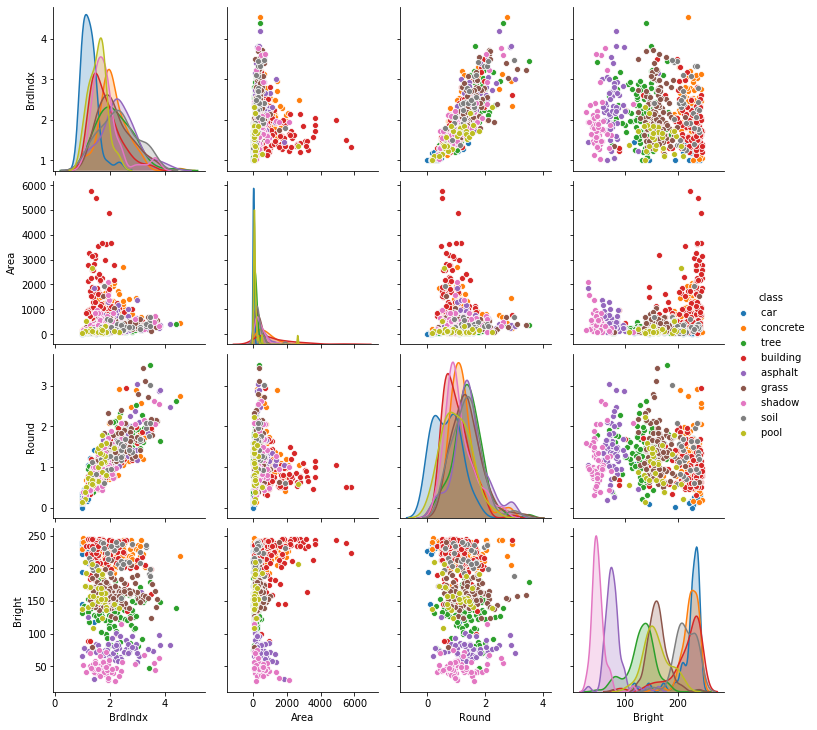

In [15]:
# Plot Continous Features
all_data.iloc[:,1:].dtype = np.float64
sns.pairplot(data = all_data.iloc[:,:5], hue = 'class')

In [16]:
all_data.pivot_table(index = 'class')

,Area,Area_100,Area_120,Area_140,Area_40,Area_60,Area_80,Assym,Assym_100,Assym_120,...,SD_R_40,SD_R_60,SD_R_80,ShpIndx,ShpIndx_100,ShpIndx_120,ShpIndx_140,ShpIndx_40,ShpIndx_60,ShpIndx_80
class,,,,,,,,,,,,,,,,,,,,,
asphalt,475.084746,5193.864407,6859.372881,8201.762712,1330.067797,2122.830508,3385.864407,0.596610,0.707119,0.683390,...,12.488644,15.568644,17.960000,2.574068,4.024068,4.434915,4.628136,3.009322,3.319831,3.685932
building,1288.336066,4781.418033,5608.983607,6260.967213,2537.311475,3288.803279,4163.442623,0.572213,0.553197,0.530984,...,8.036230,9.750984,11.860820,2.000492,2.097951,2.194016,2.322787,2.082787,2.063033,2.036148
car,75.750000,1929.000000,2631.583333,3247.722222,170.000000,282.138889,776.527778,0.593889,0.670833,0.651667,...,27.213056,36.563889,41.496111,1.413056,3.728056,3.890556,3.969167,1.966389,2.138056,2.908889
concrete,769.793103,8407.732759,10813.310345,13038.181034,2244.034483,4157.034483,6321.896552,0.745776,0.772241,0.768362,...,9.250259,11.001724,12.870086,2.508707,4.232241,4.514224,4.751466,3.099655,3.397069,3.837414
grass,346.089286,5310.241071,6988.098214,9197.232143,1082.446429,2248.419643,3715.732143,0.619554,0.621518,0.612500,...,13.268482,16.750536,20.016250,2.416964,3.575000,3.752946,4.041339,2.747500,3.086250,3.393482
pool,225.310345,820.275862,1119.241379,1604.379310,364.586207,545.241379,617.724138,0.477586,0.565517,0.572759,...,22.530690,28.471724,32.595172,1.704138,1.743793,1.863793,1.928276,1.584483,1.551034,1.562759
shadow,451.918033,2254.409836,3201.983607,3653.540984,958.000000,1337.524590,1666.131148,0.612951,0.702295,0.695574,...,11.643934,15.199508,18.557869,2.134590,2.732787,3.069836,3.231475,2.186230,2.310656,2.457377
soil,339.000000,4914.382353,7108.676471,7866.794118,907.823529,1800.941176,3313.970588,0.564412,0.682353,0.691176,...,13.402941,15.756176,17.227941,2.554118,4.117941,4.262647,4.331765,2.865588,3.271765,3.718529
tree,175.820755,2746.320755,3930.349057,4656.773585,544.990566,1068.773585,1732.443396,0.592547,0.577642,0.604623,...,18.964811,23.119623,27.920849,2.398491,3.806698,4.063868,4.207736,2.828491,3.200943,3.616981


In [17]:
# Checking for the number of null values for each feature in the data set
all_data.isnull().sum()

class            0
BrdIndx          0
Area             0
Round            0
Bright           0
                ..
Dens_140         0
Assym_140        0
NDVI_140         0
BordLngth_140    0
GLCM3_140        0
Length: 148, dtype: int64

# <font color = 'purple'>3. Splitting the Dataset into Training, Validation, and Testing Subsets<font/>

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Spliting the dataset to training, validation, and test sets

labels = all_data['class'].values.ravel()
features = all_data.drop('class', axis = 1)
variables = all_data.columns

X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.4, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state = 42)

In [20]:
# Checking whether the split is 60:20:20 for Train:Validation:Test Data Sets

print((len(X_train)/len(labels)), (len(X_test)/len(labels)), (len(X_val)/len(labels)))
print((len(y_train)/len(labels)), (len(y_test)/len(labels)), (len(y_val)/len(labels)))

0.6 0.2 0.2
0.6 0.2 0.2


# <font color = 'purple'>4. Fitting Two Models to the Data Set Using 5-Fold Cross Validation<font/>

In [21]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import warnings 

warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)

## Fitting the Random Forest Classifier to the Traing Set

In [22]:
rf = RandomForestClassifier()
scores_rf = cross_val_score(rf, X_train, y_train, cv = 5)

## Fitting the Gradient Boosting Classifier to the Training Set

In [23]:
gb = GradientBoostingClassifier()
scores_gb = cross_val_score(gb, X_train, y_train, cv = 5)

In [24]:
print('The Score for Random Forest Classifier is {}\n'.format(scores_rf))
print('The Score for Gradient Boosting Classifier is {}\n'.format(scores_gb))

The Score for Random Forest Classifier is [0.86419753 0.81481481 0.79012346 0.87654321 0.86419753]

The Score for Gradient Boosting Classifier is [0.90123457 0.80246914 0.83950617 0.82716049 0.83950617]



# <font color = 'purple'>5. Tuning Hyperparameters Using GridSearchCV<font/>

In [25]:
from sklearn.model_selection import GridSearchCV
import warnings 

warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)

In [26]:
def display(results):
    print('Best Parameters: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score'] 
    stds = results.cv_results_['std_test_score'] 
    params = results.cv_results_['params']
    
    for param, mean, std in zip(params, means, stds):
        print('Parameter {} results in a mean of {} with + or - std of {}\n'.format(param,round(mean,3),round(std,3)))

## Tuning Hyperparameters for the Random Forest Classifier

In [27]:
rf = RandomForestClassifier()
hyper_params = {
    'max_depth' : [10, 25, 50, None],
    'n_estimators' : [5, 15, 40, 100] 
}

cv = GridSearchCV(rf, hyper_params, cv = 5)
cv.fit(X_train, y_train)
display(cv)

Best Parameters: {'max_depth': 50, 'n_estimators': 100}

Parameter {'max_depth': 10, 'n_estimators': 5} results in a mean of 0.793 with + or - std of 0.032

Parameter {'max_depth': 10, 'n_estimators': 15} results in a mean of 0.825 with + or - std of 0.032

Parameter {'max_depth': 10, 'n_estimators': 40} results in a mean of 0.844 with + or - std of 0.035

Parameter {'max_depth': 10, 'n_estimators': 100} results in a mean of 0.857 with + or - std of 0.047

Parameter {'max_depth': 25, 'n_estimators': 5} results in a mean of 0.788 with + or - std of 0.051

Parameter {'max_depth': 25, 'n_estimators': 15} results in a mean of 0.81 with + or - std of 0.038

Parameter {'max_depth': 25, 'n_estimators': 40} results in a mean of 0.835 with + or - std of 0.047

Parameter {'max_depth': 25, 'n_estimators': 100} results in a mean of 0.849 with + or - std of 0.046

Parameter {'max_depth': 50, 'n_estimators': 5} results in a mean of 0.783 with + or - std of 0.036

Parameter {'max_depth': 50, 'n_estim

## Tuning Hyperparameters for the Gradient Boosting Classifier

In [28]:
gb = GradientBoostingClassifier()
hyper_params = {
    'max_depth' :  [5, 10, 20, None],
    'n_estimators' : [20, 60, 80, 100]
}

cv = GridSearchCV(gb, hyper_params, cv = 5)
cv.fit(X_train, y_train)
display(cv)

Best Parameters: {'max_depth': 5, 'n_estimators': 100}

Parameter {'max_depth': 5, 'n_estimators': 20} results in a mean of 0.783 with + or - std of 0.018

Parameter {'max_depth': 5, 'n_estimators': 60} results in a mean of 0.807 with + or - std of 0.022

Parameter {'max_depth': 5, 'n_estimators': 80} results in a mean of 0.812 with + or - std of 0.031

Parameter {'max_depth': 5, 'n_estimators': 100} results in a mean of 0.817 with + or - std of 0.016

Parameter {'max_depth': 10, 'n_estimators': 20} results in a mean of 0.728 with + or - std of 0.025

Parameter {'max_depth': 10, 'n_estimators': 60} results in a mean of 0.795 with + or - std of 0.029

Parameter {'max_depth': 10, 'n_estimators': 80} results in a mean of 0.795 with + or - std of 0.027

Parameter {'max_depth': 10, 'n_estimators': 100} results in a mean of 0.795 with + or - std of 0.032

Parameter {'max_depth': 20, 'n_estimators': 20} results in a mean of 0.721 with + or - std of 0.025

Parameter {'max_depth': 20, 'n_estima

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import sklearn.metrics

## Fitting the Best Random Forest Model on the Full Train Set

In [30]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 50 )
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Fitting the Best Gradient Boosting Model on the Full Train Set

In [31]:
gb = GradientBoostingClassifier(n_estimators = 100, max_depth = 5 )
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# <font color = 'purple'> 6. Evaluating the Best Models on the Validation Set<font/>

## Evaluating the Best  Random Forest Model on the Validation Set

In [32]:
classes = sorted(list(set(all_data['class'])))
y_pred = rf.predict(X_val)
print(sklearn.metrics.classification_report(y_val, y_pred))

              precision    recall  f1-score   support

    asphalt        0.79      0.92      0.85        12
   building        0.83      0.86      0.84        28
        car        0.83      1.00      0.91         5
   concrete        0.84      0.84      0.84        25
      grass        0.73      1.00      0.84        16
       pool        1.00      0.71      0.83         7
     shadow        1.00      0.92      0.96        12
       soil        1.00      0.56      0.71         9
       tree        1.00      0.86      0.92        21

    accuracy                           0.86       135
   macro avg       0.89      0.85      0.86       135
weighted avg       0.88      0.86      0.86       135



## The Best Model of the Gradient Boosting Classifier Being Evaluated on Validation Set

In [33]:
classes = sorted(list(set(all_data['class'])))
y_pred = gb.predict(X_val)
print(sklearn.metrics.classification_report(y_val, y_pred))

              precision    recall  f1-score   support

    asphalt        0.91      0.83      0.87        12
   building        0.78      0.89      0.83        28
        car        0.67      0.80      0.73         5
   concrete        0.83      0.76      0.79        25
      grass        0.68      0.81      0.74        16
       pool        1.00      0.86      0.92         7
     shadow        0.91      0.83      0.87        12
       soil        0.83      0.56      0.67         9
       tree        0.81      0.81      0.81        21

    accuracy                           0.81       135
   macro avg       0.82      0.79      0.80       135
weighted avg       0.82      0.81      0.81       135



# <font color = 'purple'> 7. Evaluating the Two Best Models on the Test Set<font/>

## Evaluating the Best Random Forest Model on the Test Set

In [34]:
classes = sorted(list(set(all_data['class'])))
y_pred = rf.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    asphalt        0.92      1.00      0.96        12
   building        0.81      0.88      0.84        24
        car        0.91      0.91      0.91        11
   concrete        0.87      0.87      0.87        23
      grass        0.76      0.88      0.81        25
       pool        1.00      1.00      1.00         1
     shadow        0.70      1.00      0.82         7
       soil        1.00      0.50      0.67         4
       tree        0.90      0.64      0.75        28

    accuracy                           0.84       135
   macro avg       0.87      0.85      0.85       135
weighted avg       0.85      0.84      0.83       135



## Evaluating the Best Gradient Boosting Model on the Test Set

In [35]:
classes = sorted(list(set(all_data['class'])))
y_pred = gb.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    asphalt        0.86      1.00      0.92        12
   building        0.85      0.96      0.90        24
        car        1.00      0.64      0.78        11
   concrete        0.84      0.91      0.87        23
      grass        0.81      0.88      0.85        25
       pool        1.00      1.00      1.00         1
     shadow        0.71      0.71      0.71         7
       soil        0.67      0.50      0.57         4
       tree        0.88      0.75      0.81        28

    accuracy                           0.84       135
   macro avg       0.85      0.82      0.82       135
weighted avg       0.85      0.84      0.84       135

